<a href="https://colab.research.google.com/github/jakelaporte/MathematicalModeling/blob/master/Lsn03_StepFunction_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lesson 3 - Optimization / Step Function
Let's build the optimization function for problem 4 in the book. We will put everything in this problem in terms of days (time), miles (distance), and dollars (currency).<br><br>
Variables/Facts: <ol>
- 200 miles of coast to clean
- $x$ = additional crews to hire<br> 
- $d$ = time it takes to clean <br>    
- $r$ = clean-up rate for a crew (miles/day)<br>
- $C_1$ = cost of local cleanup crew (dollars) = $500d$<br>
- $C_2$ = cost of $x$ additional crews (dollars) = $\left(18000+800d\right)x$ <br>
- $C_{\text{fine}}$ = cost of fines after 14 days<br>
- $C$ = total cost of clean-up = $C_1+C_2+C_{\text{fine}}$
</ol>

Assumptions: <ol>
- days to complete clean-up are not affected by anything other than the number of crews (weather, etc): $d = \frac{200}{r(x+1)}$
- cost for fines are only levied after 14 days - becomes a step function and is implemented below: <br><br>
    $$C_\text{fine}\begin{align}\left\{ \begin{array}{cc} 
                10000(d-14) & \hspace{5mm} d>14 \\
                0 & \hspace{5mm} d \le 14 \\
                \end{array} \right.
\end{align}$$<br>
- all of the crews clean-up the spill at the same rate as the local crew $r=5/7$ (miles/day)

</ol>

The objective function is as follows:
$$ f(x) = 500\frac{200}{r(x+1)}+\left(18000+800\frac{200}{r(x+1)}\right)x+ 
\begin{align}
\left\{ \begin{array}{cc} 
                10000\left(\frac{200}{r(x+1)}-14\right) & \hspace{5mm} \frac{200}{r(x+1)}>14 \\
                0 & \hspace{5mm} \frac{200}{r(x+1)} \le 14 \\
                \end{array} \right.
\end{align}
$$

Let's discuss how to define a step function in R. Use the boolean operators which return 1 or 0 if the operation is True or False respectively.

In [0]:
## Define the function using boolean statements such as >, <=, == 
r = 5/7
fT = function(x){500*(200/(r*(x+1)))+(18000+800*200/(r*(x+1)))*x+(200/(r*(x+1))>14)*(10000*(200/(r*(x+1))-14))}

Notice how the statement in the step function that requires a True or False term is used in the creation of the R function. Suppose we had the following function and wanted to define and then plot it:
$$f(x) =  \begin{align}
\left\{ \begin{array}{cc} 
                1 & \hspace{5mm} x\le-2 \\
                x & \hspace{5mm} -2<x<3 \\
                -x & \hspace{5mm} x \ge 3
                \end{array} \right.
\end{align} 
$$
```R
x = seq(-5,5,0.01)
f = function(x)(x<=-2)*1+(x>-2)*(x<3)*(x)+(x>=3)*(-x) 
f = Vectorize(f)
plot(x,f(x),type="l")
```


#### Use this function and what we have already done in class to find the answers to problem 4.


## Section 3.1 Plotting Fundamentals in R
R has a rich library of procedures for transforming data and producing graphics. This assignment focuses on basic graphics functions that are the building blocks for many plots. The building blocks provide control of basic graphic entities such as
layout, axes, points, lines and polygons.  I have such building blocks to create templates for higher level graphics such as linked micromaps, conditioned choropleth maps, and time series maps.  You can create your own templates to. The inclusion of statistics in my graphics helps to distinguish my templates from somewhat similiar work of others. This is where languages such as R and Splus are really helpful. Another distinguishing feature in my work is the migration to of static templates to interactive and dynamic implementions most commonly in Java.  The statistical languages really helped in testing ideas for faster calculations and testing the Java implementation results.

## Graphics Functions - High and Low level functions
It is important to understand the distinction between high-level and low-level graphics functions. High-level graphics functions start a new graph by initializing the window and creating it if necessary, sets the scale and draws all of the titles and labels. A low-level graphic function cannot start a new graph; rather, it adds something to an existing one.
#### High-Level Graphics commands
```R
plot() #Generic plotting function
boxplot() #Create a box plot
hist() #Create a histogram
qqnorm() #Create a quantile-quantile plot
curve() #Graph a function
```

#### Low-Level Graphics commands
```R
points() #Add points
lines() #Add lines
abline() #Add a straight line
segments() #Add line segments
polygon() #Add a closed polygon
text() #Add text
```
The *plot* functions is a polymorphic function meaning that it changes its behavior depending on the type of input argument.
As you notice a ```plot``` command in the following examples, notice the type of input to the function which will help you understand what the plot function is doing.


#### Plot, type, xlab, ylab, xlim, ylim
type = <br>
"n" means scale but do not plot<br>
"p" means points<br>
"l" means lines, (this the letter lower case L not the number 1)<br>

"b" means both points and lines<br>
"c" means the line part of "b"<br>
"o" means overplot points on lines, and is similar to "b"<br>
"h" means histogram or high-density vertical lines<br>
"s" means stair steps. when x1 < x2 it draws horizonally first<br>
"S" like "s" but draws vertically first

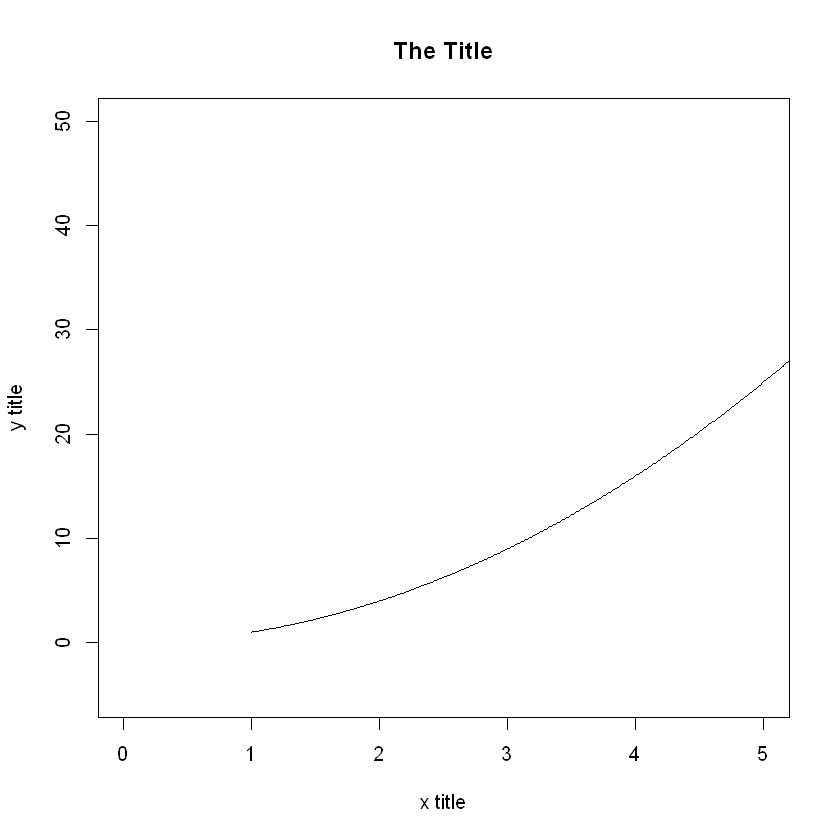

In [0]:
## Plot, type, xlab, ylab, xlim, ylim ##
x = seq(1,10,.01)
f = function(x) x^2
y=f(x)
plot(x,y,
    type="l",
    xlab="x title",
    ylab="y title",
    main = "The Title",
    xlim = c(0,5),
    ylim = c(-5,50))

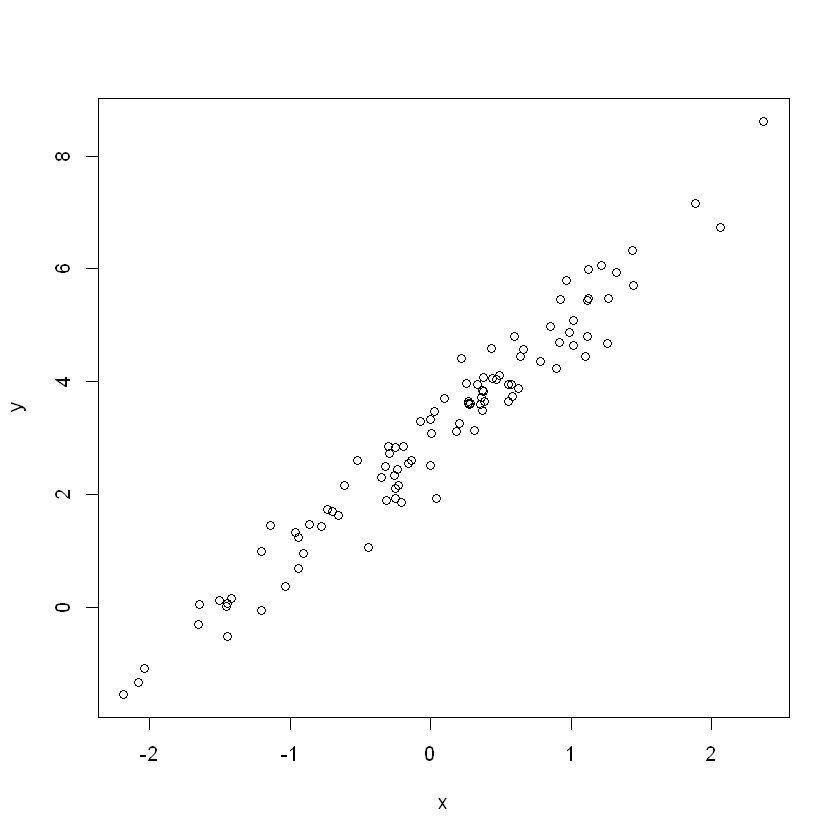

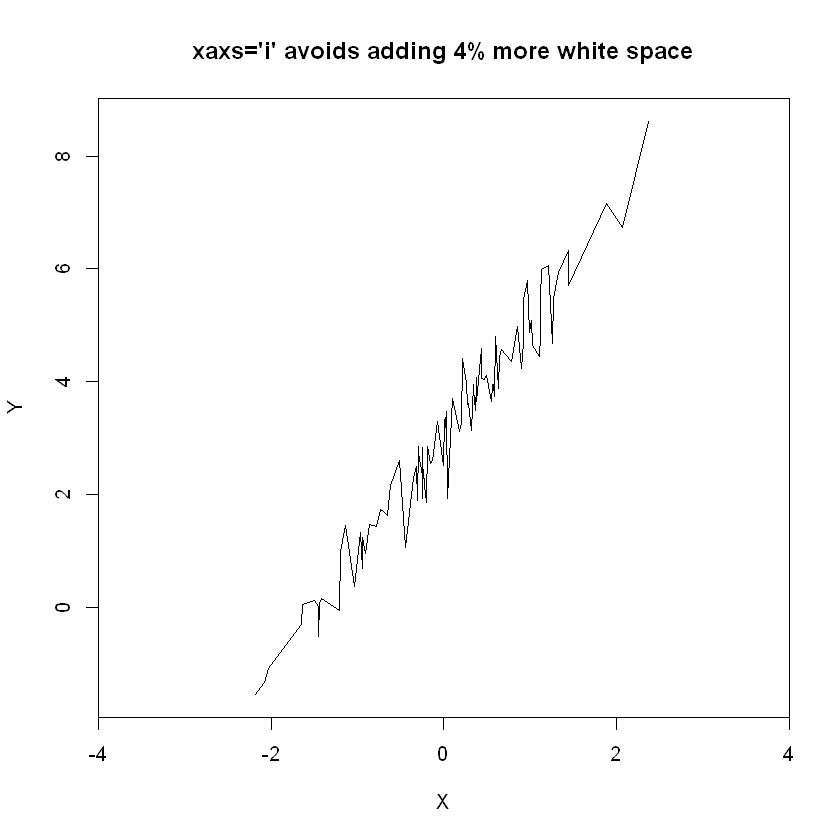

In [0]:
## Run
x = rnorm(100)
y = 2*x+3 + rnorm(100,sd=.4)
plot(x,y)
##
ord = order(x)
plot(x[ord],y[ord],type="l", main="xaxs='i' avoids adding 4% more white space",xlab="X", ylab="Y",xlim= c(-4,4),xaxs='i')

#### Argument
<ol>
- pch= specifies the plotting symbol by character or number.<br>
Often plotting symbol can be given as a single chararcter in quotes as above<br>
- cex = specifies a multiple of the default character size<br>
- col = specifies the color in hexadecimal format
</ol>
The argument vectors cycle to match the number of needed values for the number of points.

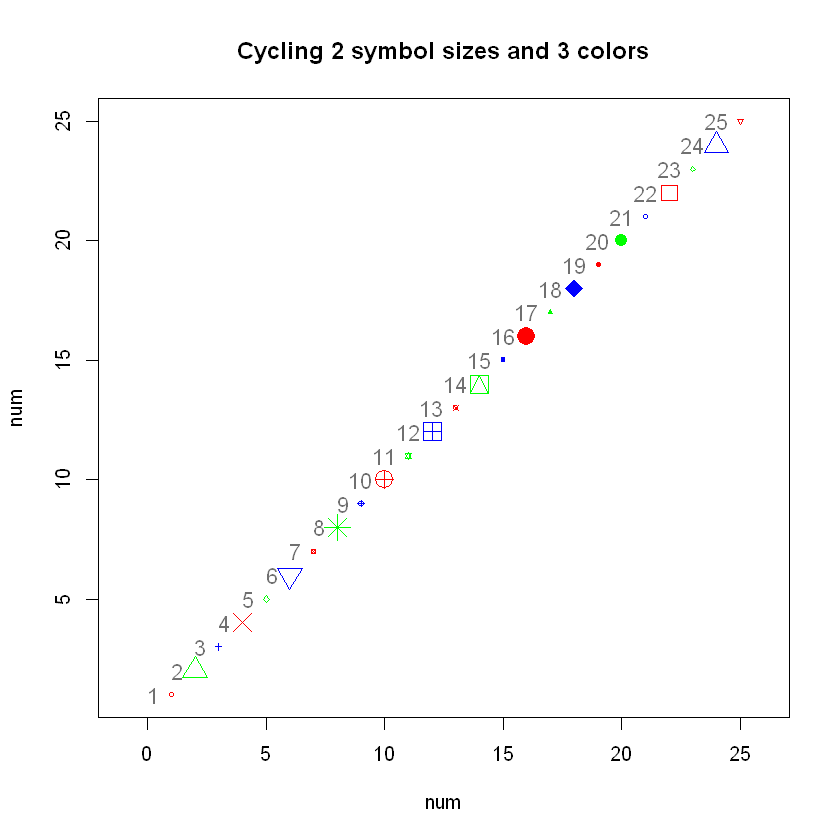

In [0]:
num = 1:25
plot(num,num,pch=num,cex=c(.5,2),col=c("red","green","blue"),
xlim=c(-1,26),
main="Cycling 2 symbol sizes and 3 colors")
text(num-.5,num,num,adj=1,cex=1.1,col="#707070")


The main color setting for basic graphics are col, fg, and bg.<br>
<ol>
- col: This keywork is typically for the color of points, lines, and polygons drawn in the plot.
fg: This keywork roughly stands for foreground. This typically controls the plot outline, axes,
ticks, tick labels and text.<br>
- bg: This keywork stands for background and typically indicates the window fill color.
</ol>
The values for col, fg, and bg can be strings giving color names. R recognizes 657 color names such a "red", "blue", "skyblue" and "yellowgreen". R will also recognize strings that starts with a "#" are followed by a hexadecimal code for red, green, blue and alpha intensities. The default for alpha transparency is opaque (FF) and is often omitted. For example "#FF000000" will produce red. More about this coding appears below.<br>

R uses a string starting with a "#" to represent color. This is following by a hexadecimal representation for red, green, blue and alpha, respectively. In "#FFACBB80", FF encodes the red intensity, AC encodes the green intensity, BB encodes the blue intensity, 80 encodes the transparency larger values being more opaque. Hexadecimal provides a way to represent four bit binary numbers with a single character. As examples, 0 means 0000 in binary, 1 means 0001, 2 means 0010, 9 means 1001, A means, 1010, and F means 1111. <br>
The pair 00 represents an 8 bit binary number 00000000<br>
The pair FF represents an 8 bit binary number 11111111<br>
The 00 and FF are the values are 0 and 255 in decimal. These used to be the range of color intensities for red, green or blue on many graphics devices. (The trend is toward floating point intensities for red green and blue).

In [0]:
palette()
## col = 1 would refer to black, col=2 refers to red, etc

[1] "black"   "red"     "green3"  "blue"    "cyan"    "magenta" "yellow" 
[8] "gray"

[1] "#FF0000FF" "#FF3D00FF" "#FF7A00FF"

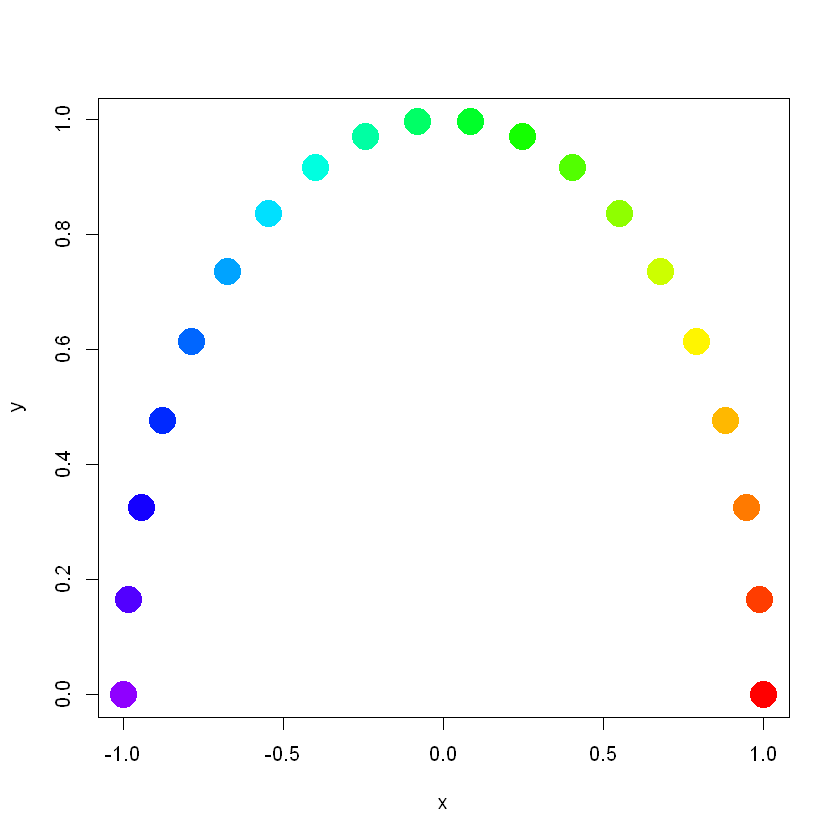

In [0]:
## Illustrates the rainbox color function
angle = seq(0,pi,length=20)
x = cos(angle)
y = sin(angle)
myColors = rainbow(25) # made purposely longer than 20
plot(x,y,pch=16,cex=3,col=myColors)
myColors[1:3] # by default print the object value
##

In [0]:
## Run Used in LM Plots presented later in class
rgbMat = matrix(c(
.00, .00, .00, #1 text, lines: black
1.00,1.00,1.00, #2 lines: white
.90, .90, .90, #3 panel fill: light gray
1.00, .15, .15, #4 region 1: red
1.00, .70, .31, #5 region 2: orange from Atlas
.00, .90, .00, #6 region 3: green3
.20, .50,1.00, #7 region 4: greenish blue
.70, .40,1.00, #8 region 5: lavendar
.50, .50, .50, #9 region 6, lines: middle gray
.30, .30, .30, #10 dark gray
.93,1.00, .93, #11 reference interval fill, light green
.90, .80,1.00, #12 dark yellow foreground
1.00,1.00, .88, #13 light yellow foreground
.90, .90, .90, #14 another light gray
.00, .50, .00), #15 mid green
ncol=3,byrow=T)
rgbHex = rgb(rgbMat[,1],rgbMat[,2],rgbMat[,3])
rgbHex
##
palette(rgbHex) # Running this would change the palette
palette("default") #Brings it back to the default

[1] "#000000" "#FFFFFF" "#E6E6E6" "#FF2626" "#FFB34F" "#00E600" "#3380FF"
 [8] "#B366FF" "#808080" "#4D4D4D" "#EDFFED" "#E6CCFF" "#FFFFE0" "#E6E6E6"
[15] "#008000"

## Section 3.3: Lines, Segments, and Arrows
lines(x, y = NULL, type = "l", col = par("col"),
        lty = par("lty"), ...)
The main arguments are<br>
<ol>
<li>col: color as described before
<li>lty: line type, default "solid", options: "solid","dashed","dotted", ...
<li>lwd: line width, default usually means 1 pixel or .75 points (font size)
</ol>

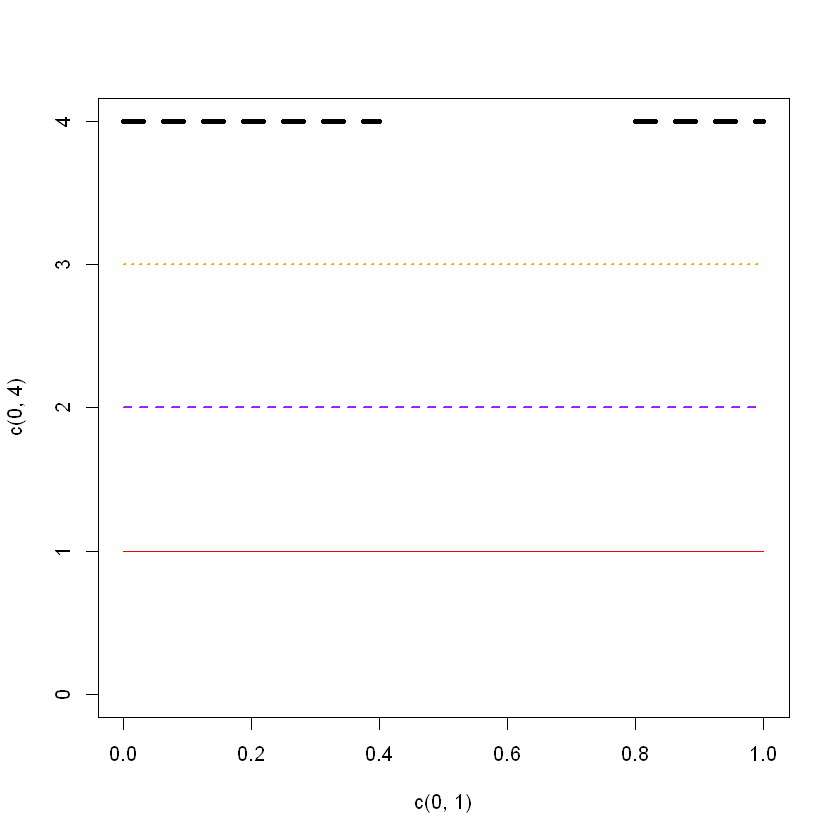

In [0]:
## lines, lwd (line width), lty (line type)
x = c(0,1)
y1 = c(1,1)
y2 = c(2,2)
y3 = c(3,3)
x4 = seq(0,1,length=6)
y4 = rep(4,6)
x4[4]= NA # insert a missing data code. This forces the pen to lift
xRange = range(x,na.rm=T) # remove missing data then compute
yRange = range(y)
plot(c(0,1),c(0,4),type='n')
lines(x,y1,col="red",lty="solid",lwd=1)
lines(x,y2,col="purple",lty="dashed",lwd=2)
lines(x,y3,col="orange",lty="dotted",lwd=2)
lines(x4,y4,col="black",lty="dashed",lwd=4)
##

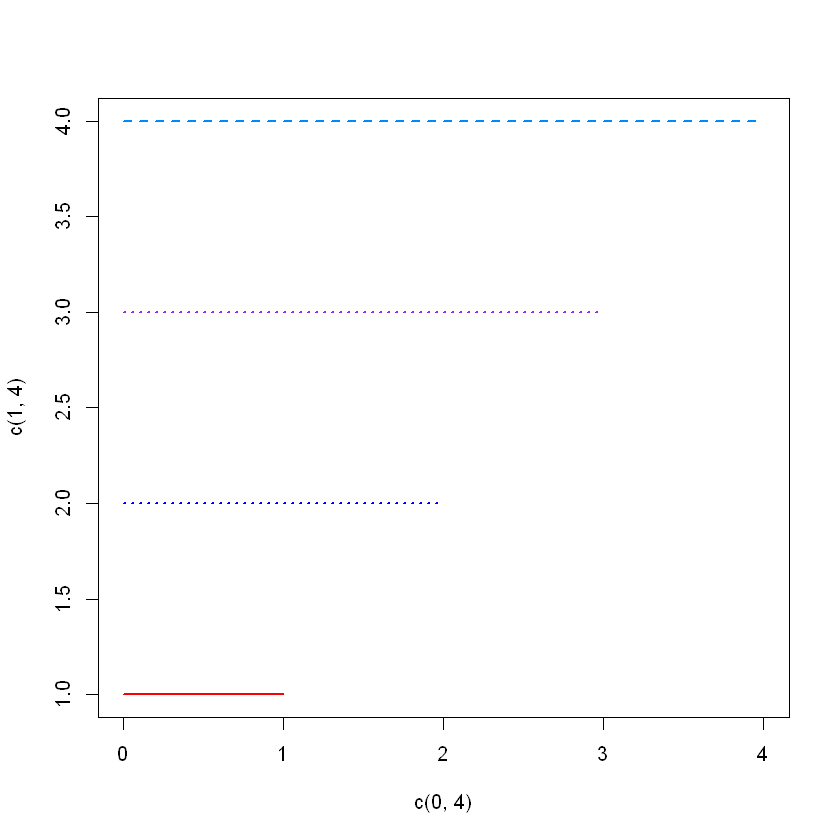

In [0]:
w0 = rep(0,4)
w1 = 1:4
z0 = 1:4
z1 = 1:4
plot(c(0,4),c(1,4),type='n')
segments(w0,z0,w1,z1,lty=c("solid","dotted","dotted","dashed"),
    col=c("red","blue","Purple","#0088FF"),lwd=2)

## Section 3.4: Plotting Vectors - use the arrow command
Arrows have additional arguments the use only first value if a vector is given.<br>
<ol>
<li>length: of the arrow in inches
<li>angle: the angle of the arrow tip in degrees
<li>code: 1=arrow tip a the first point of the pair, 2= second point, 3 = both points
</ol>

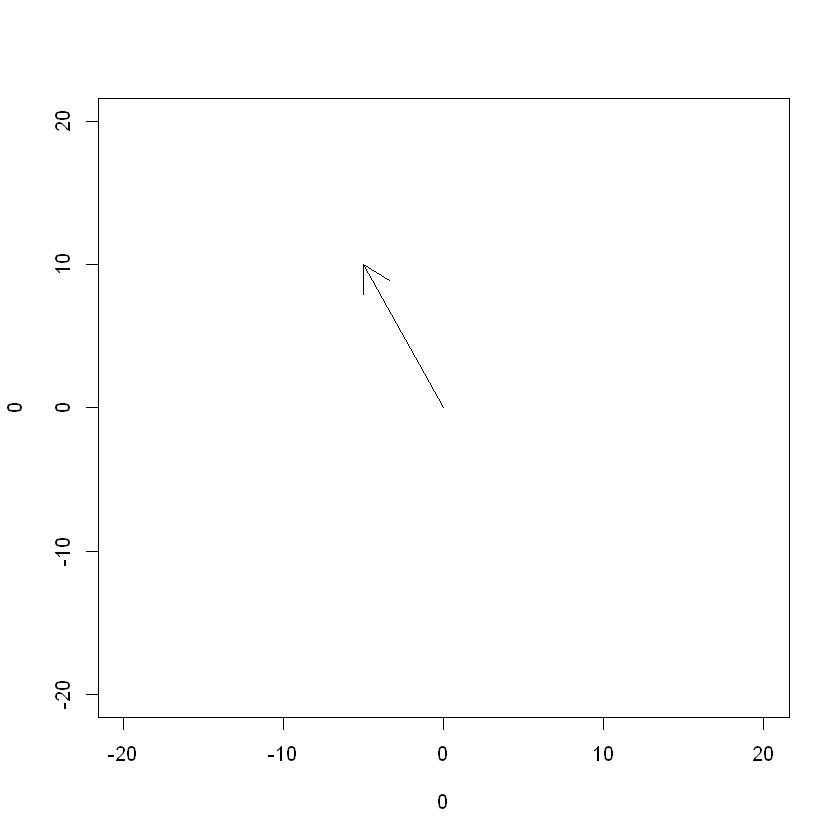

In [0]:
x0=0;y0=0;x1=-5;y1=10
plot(0,0,xlim=c(-20,20),ylim=c(-20,20),type='n')
segments(x0, y0, x1, y1, col = par("fg"), lty = par("lty"), lwd = par("lwd"))
arrows(x0, y0, x1, y1, length = 0.25, angle = 30, code = 2,
    col = par("fg"), lty = NULL, lwd = par("lwd"), xpd = NULL)

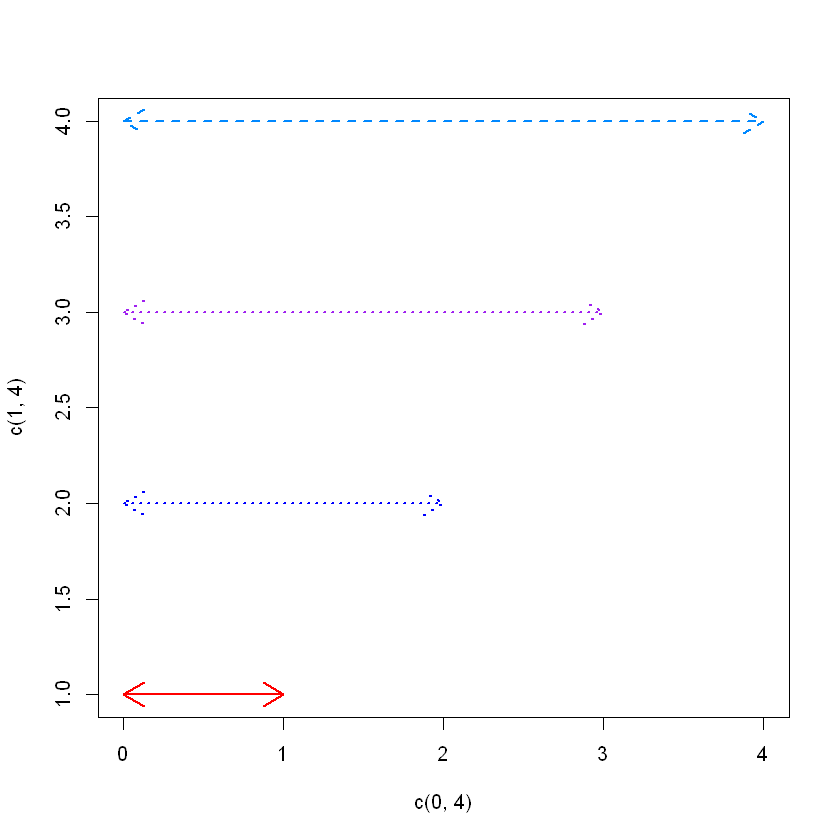

In [0]:
w0 = rep(0,4)
w1 = 1:4
z0 = 1:4
z1 = 1:4
plot(c(0,4),c(1,4),type='n')
arrows(w0,z0,w1,z1,lty=c("solid","dotted","dotted","dashed"),
col=c("red","blue","Purple","#0088FF"),length=.2,code=3,lwd=2)

## Section 3.5: Polygons 
polygon(x, y = NULL, density = NULL, angle = 45, border = NULL, col = NA, lty = NULL, xpd = NULL, ...)<br>
polygons(x,y,col=1,density=-1,border=F)<br>
For a simple sequence of x and y values polygon(x,y) constructs and fills a polygon. R automatically connects the last point in the sequence to the first point. The first point does not need to be duplicated, but this doesn't hurt.<br><br>
Stacking Polygons: Separate polygons composed of simple x and y sequences, can be separated by NA's and stacked in two big x and y vectors. This renders faster than using multiple calls to polygon(). A whole map can be constructed with two
calls to polygon(). One call to fill the regions with different colors and one call to redraw the region outlines in gray.

Multiple colors:
The col argument can be vector and the subscript advances 1 after each polygon is closed due to encountering NA in x or y or both. The vector is repeated as necessary to make a long vector if the subscripts to beyond the length. In particular a single vlue argument will be used for all of the polygons drawn. 
<ol>
<li>density= The value 0 prevents filling of the polygon. -1 allows color fill
<li> border= The color to draw the border. NA or F means don't draw it.NULL or T means used the default, the "fg" color. The value T causes the border to be drawn.

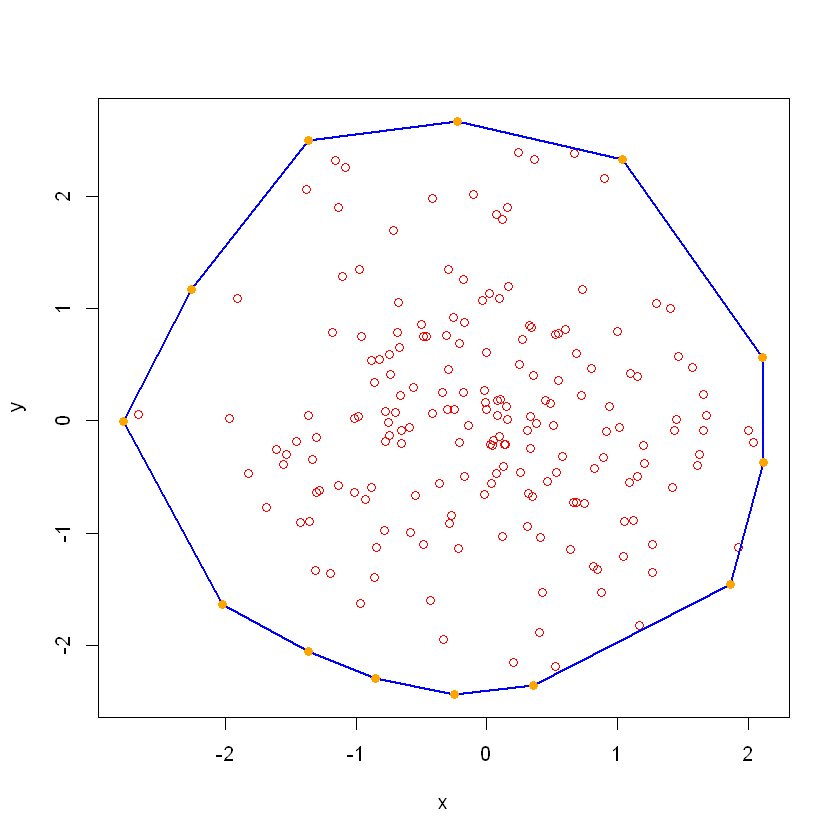

In [0]:
## Polygon ##
x = rnorm(200)
y = rnorm(200)
hull = chull(x,y) # find the convex hull
plot(x,y,col="red")
polygon(x[hull],y[hull],density=0,col="blue",lwd=2) # draw hull
points(x[hull],y[hull],col="orange",cex=1,pch=16)
